In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
SEED = 123

### LOAD TRAINSET

In [3]:
DATA_PATH = "../data/trainset.csv"
data_train = pd.read_csv(DATA_PATH, delimiter=",")

In [4]:
data_train

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,687,Germany,Male,44,8,95368.14,2,1,1,1787.85,0
1,660,France,Female,35,6,100768.77,1,1,0,19199.61,0
2,684,Spain,Male,41,2,119782.72,2,0,0,120284.67,0
3,725,Germany,Male,40,8,104149.66,1,1,0,62027.90,0
4,510,France,Male,63,8,0.00,2,1,1,115291.86,0
...,...,...,...,...,...,...,...,...,...,...,...
7995,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0
7996,757,France,Male,46,0,0.00,2,1,0,37460.05,0
7997,499,France,Female,57,1,0.00,1,0,0,131372.38,1
7998,516,Germany,Female,47,9,128298.74,1,0,0,149614.17,1


In [5]:
cat_variables = ["country","gender","credit_card","active_member"]
dis_variables = ["products_number","tenure","age","credit_score"]
con_variables = ["balance","estimated_salary"]
num_variables = dis_variables + con_variables

target_variable = ["churn"]

### SELECT TARGET AND FEATURES

In [6]:
X_train = data_train.drop(columns=target_variable)
y_train = data_train[target_variable]

### Target Variable

In [7]:
# Calcolo delle percentuali di churn
total_count = y_train.shape[0]
churn_count = y_train["churn"].sum(axis=0)

yes_percentage = (churn_count / total_count) * 100
no_percentage = 100 - yes_percentage

# Creazione della tabella
table = pd.DataFrame({"churn": ["yes", "no"], "percentage": [f"{yes_percentage:.2f}%", f"{no_percentage:.2f}%"]}).set_index("churn")

print(table)

      percentage
churn           
yes       20.38%
no        79.62%


# --------------------------------------------------------

### Numeric Variables
- > Continuous Variables
- > Discrete Variables

#### Linear Correlation - Pearson

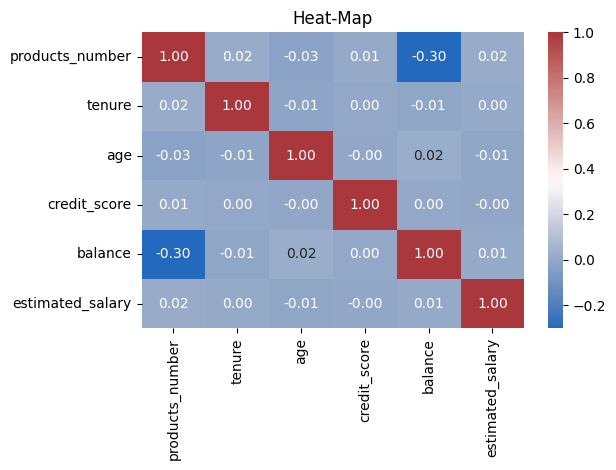

In [8]:
sns.heatmap(X_train[num_variables].corr(method='pearson'),annot=True, fmt=".2f", cmap="vlag")
plt.title("Heat-Map")
plt.tight_layout();

#### Monotonic Correlation - Spearman

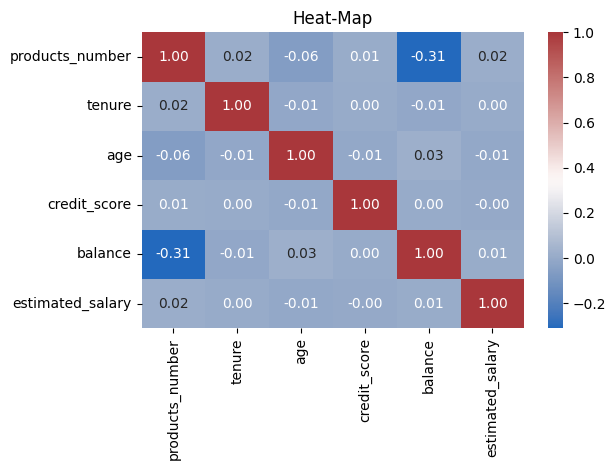

In [9]:
sns.heatmap(X_train[num_variables].corr(method='spearman'),annot=True, fmt=".2f", cmap="vlag")
plt.title("Heat-Map")
plt.tight_layout();

#### Continuous Variables

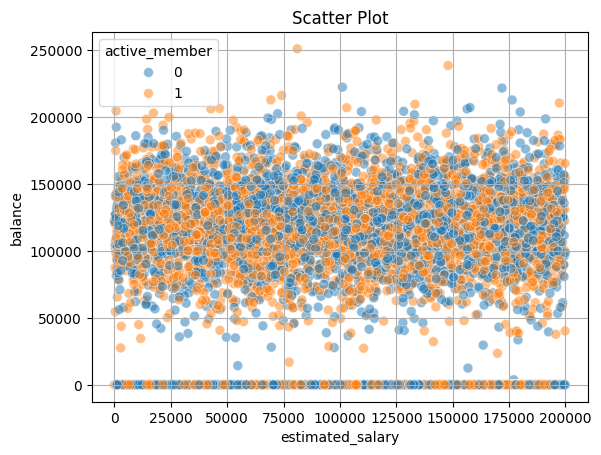

In [10]:
sns.scatterplot(data=X_train, x="estimated_salary", y="balance", hue="active_member", alpha=0.5, s=50, edgecolor='w')
plt.xlabel("estimated_salary")
plt.ylabel("balance")
plt.title("Scatter Plot")
plt.legend(title="active_member")
plt.grid(True)
plt.tight_layout;

#### No linear correlation:
 - > Person coeff = 0.01

#### Discrete Variables

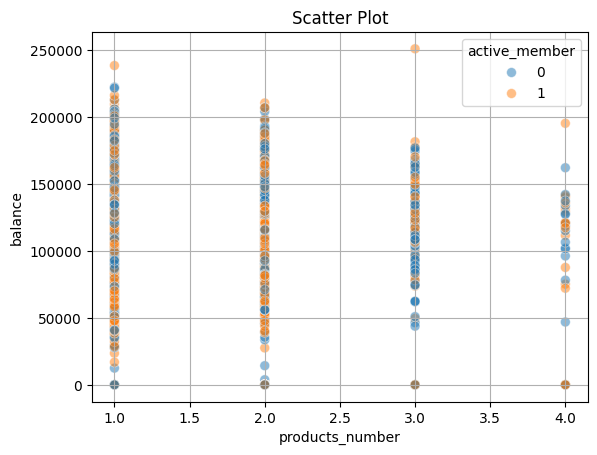

In [11]:
sns.scatterplot(data=X_train, x="products_number", y="balance", hue="active_member", alpha=0.5, s=50, edgecolor='w')
plt.xlabel("products_number")
plt.ylabel("balance")
plt.title("Scatter Plot")
plt.legend(title="active_member")
plt.grid(True)
plt.tight_layout;

#### Poor linear correlation:
 - > Person coeff = -0.30

### Distributions

In [12]:
def plot_box(data_train, x, y, hue=None):
    fig, ax = plt.subplots(figsize=(5, 5))

    sns.boxplot(data=data_train, x=x, y=y, hue=hue)
    ax.set_title("Box Plot")
    ax.set_xlabel(x)
    ax.grid(True)

    plt.tight_layout()
    plt.show()

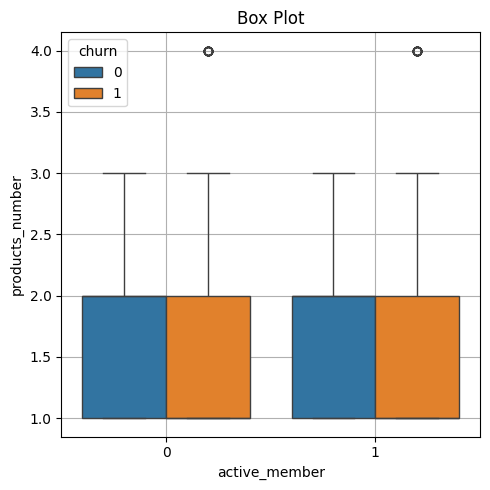

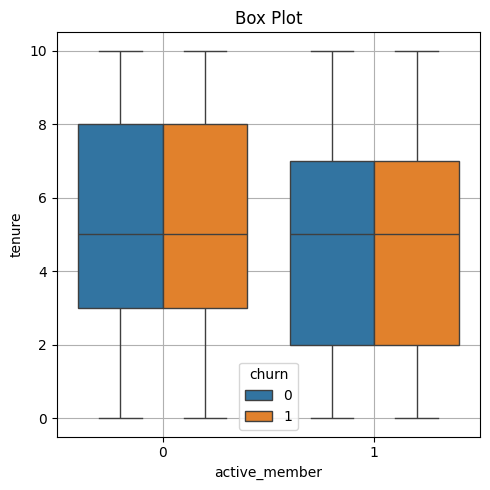

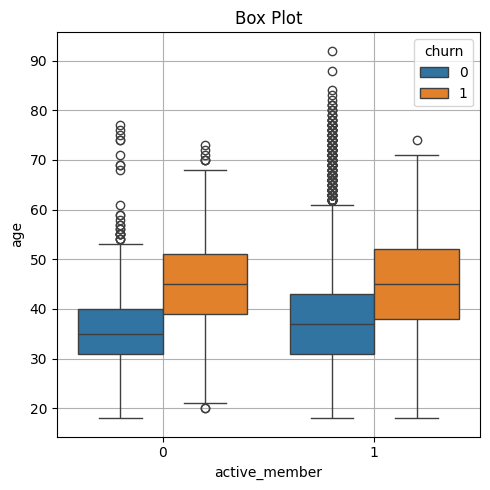

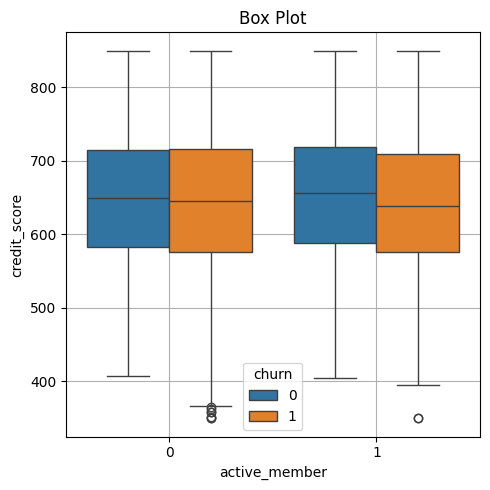

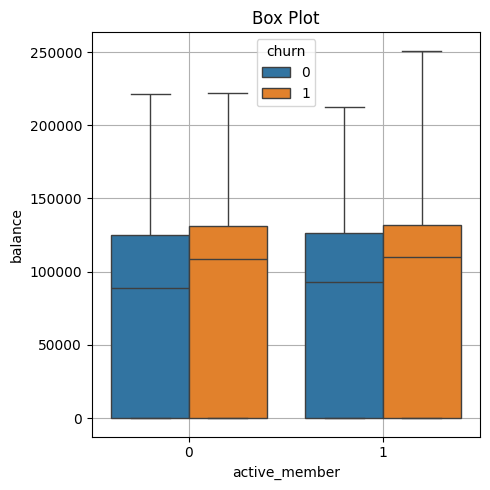

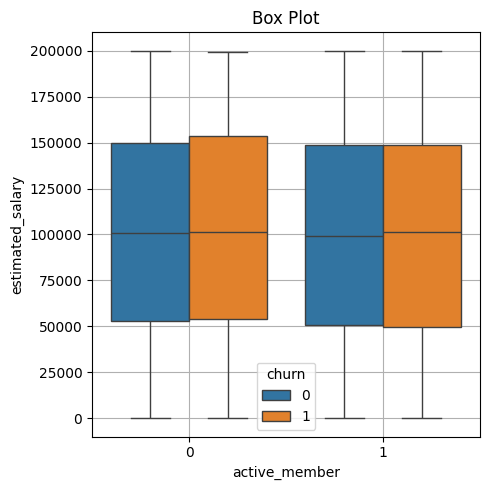

In [13]:
for clm in num_variables:
    plot_box(data_train, x="active_member", y=clm, hue="churn")

# --------------------------------------------------------

### Categorical Variables

In [14]:
def plot_count(data, x, y):
    sns.countplot(data=data, x=x, hue=y, stat="percent")
    plt.xlabel(x)
    plt.ylabel("percent")
    plt.title("Count Plot")
    plt.grid(True)
    plt.show()

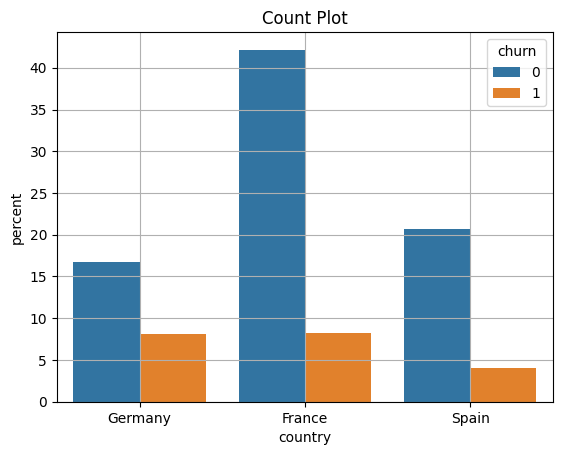

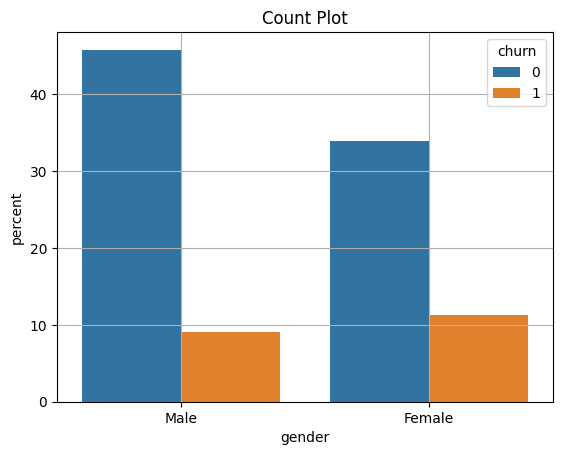

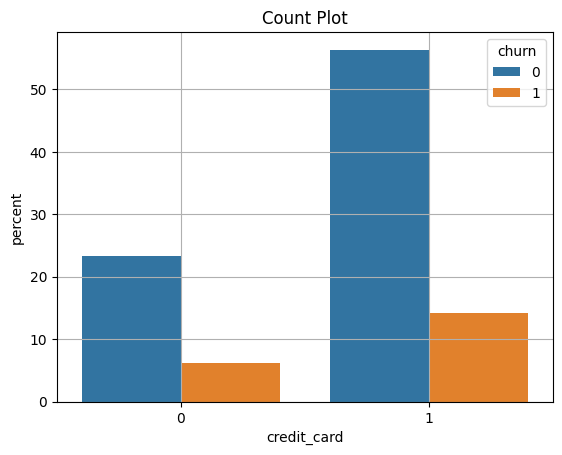

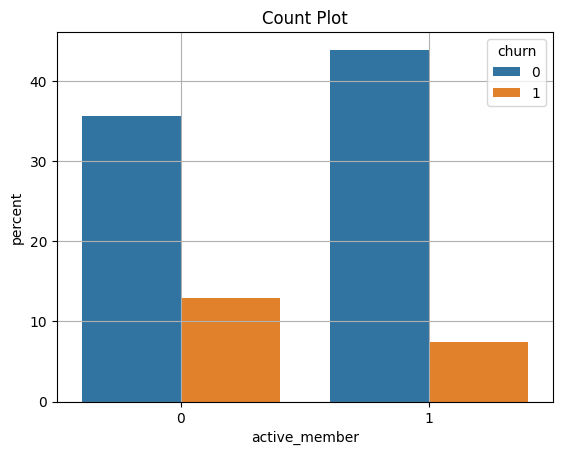

In [15]:
for clm in cat_variables:
    plot_count(data_train, x=clm, y="churn")